# Machine Learning for linear regression problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Weight vs height dataset

In [8]:
# load the dataset
X = np.loadtxt("data/linear_regression/weight.csv", delimiter=",")
y = np.loadtxt("data/linear_regression/height.csv", delimiter=",")
print(f"First 5 weights: {X[:5]}")
print(f"First 5 heights: {y[:5]}")

First 5 weights: [109.72098511  73.62273185  96.49755015  99.80950419  93.59861876]
First 5 heights: [1.87571423 1.74706036 1.88239668 1.82196685 1.77499761]


In [9]:
len(X)

10000

In [10]:
class LinearRegression:
    def __init__(self):
        self.slope_0 = np.random.normal(-1,1)
        self.intercept_0 = np.random.rand()

    def fit(self, X, y, learning_rate, epochs):
        self.slope = self.slope_0
        self.intercept = self.intercept_0
        self.error = []

        N = X.shape[0]
        
        for i in range(epochs):
            self.dcostdm =  np.sum(np.multiply(((self.slope*X+self.intercept)-y),X))*2/N
            self.dcostdc = np.sum(((self.slope*X+self.intercept)-y))*2/N         
            self.slope -= learning_rate*self.dcostdm 
            self.intercept -= learning_rate*self.dcostdc
            training_prediction = self.predict(X)
            error = self.MSE(training_prediction, y)
            self.error.append(error)
    
    def MSE(self, prediction, y):
        return np.linalg.norm(prediction - y)**2/prediction.shape[0]

    def predict(self, X):
        return self.slope*X + self.intercept

In [11]:
# standardization of the dataset
mean_weight = np.mean(X)
std_weight = np.std(X)
mean_height = np.mean(y)
std_height = np.std(y)
X_norm = (X-mean_weight)/std_weight
y_norm = (y-mean_height)/std_height

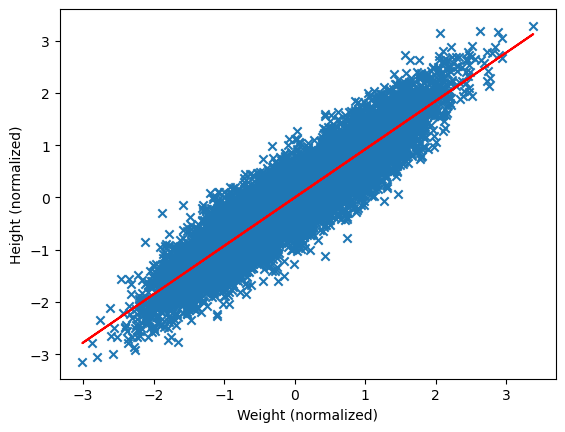

0.9247315235320014 1.6306633319749876e-06


In [12]:
lr = LinearRegression()
lr.fit(X_norm,y_norm, 0.1, 50)
plt.scatter(X_norm, y_norm, marker="x")
pred = lr.predict(X_norm)
plt.plot(X_norm, pred,'r')
plt.xlabel("Weight (normalized)")
plt.ylabel("Height (normalized)")
plt.show()
print(lr.slope, lr.intercept)

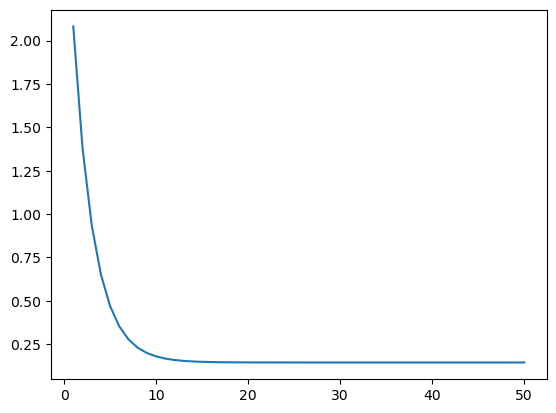

In [13]:
# learning curve
plt.plot(np.arange(1,len(lr.error)+1,1),lr.error)
plt.show()

In [14]:
# training set error
train_pred = lr.predict(X_norm)
lr.MSE(train_pred, X_norm)

0.00566534355247272

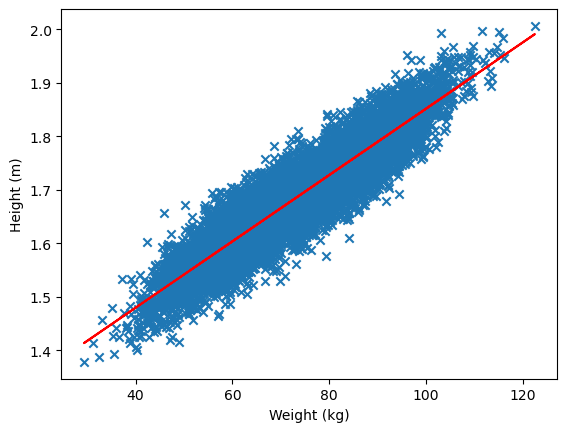

In [16]:
# compare the prediction of the model vs the non-normalized dataset
plt.scatter(X, y, marker="x")
pred = std_height*lr.predict(X_norm)+mean_height
plt.plot(X, pred,'r')
plt.xlabel("Weight (kg)")
plt.ylabel("Height (m)")
plt.show()